# Classification using K Nearest Neighbors


In [9]:
#import neccessities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's take look at our Churn dataset

In [10]:
churn_df= pd.read_csv("churn.csv")

churn_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


As we can see, the column 'churn' is not dependent on last 3 columns that are state, area_code and phone.
So we'll drop those from dataframe.

In [11]:
churn_df.drop(['State','Area_Code','Phone'],axis=1,inplace=True)
churn_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73


In [12]:
print(churn_df.shape)

(3333, 18)


I changed categorocal values into numerical.

In [23]:
df=churn_df.replace('no',0)
df.replace('yes',1,inplace=True)

In [24]:
#churn_df.to_csv('mod_churn.csv')
#I changed categorocal values into numerical using excel.
#df=pd.read_csv('mod_churn.csv')
df

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,77,26.55,126,18.32,83,12.56,6,2.67
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,105,36.35,84,13.57,137,6.26,10,1.35


## EDA

let's perform some exploratory data analysis. 
we'll check dependency of churn on each label.

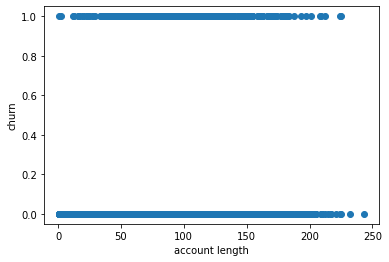

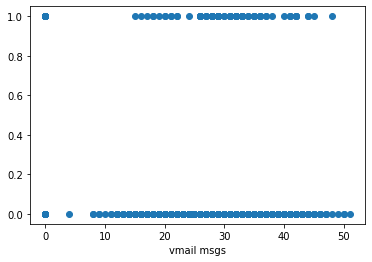

In [25]:
y=df['Churn']
plt.scatter(df['Account_Length'].values, y.values, label='acc length')
plt.xlabel('account length')
plt.ylabel('churn')
plt.show()

plt.scatter(df['Vmail_Message'].values,y.values, label='vmail msgs')
plt.xlabel('vmail msgs')
plt.show()


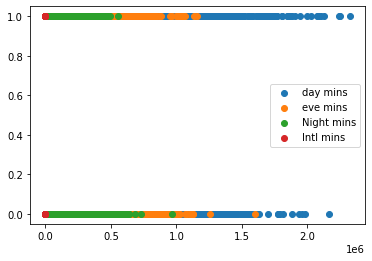

In [26]:
plt.scatter((df['Day_Mins']*df['Day_Charge']*df['Day_Calls']).values,y.values,label='day mins')
plt.scatter((df['Eve_Mins']*df['Eve_Charge']*df['Eve_Calls']).values,y.values,label='eve mins')
plt.scatter((df['Night_Mins']*df['Night_Charge']*df['Night_Calls']).values,y.values,label='Night mins')
plt.scatter((df['Intl_Mins']*df['Intl_Charge']*df['Intl_Calls']).values,y.values,label='Intl mins')

plt.legend()
plt.show()

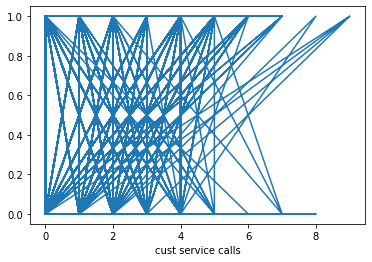

In [27]:
plt.plot(df['CustServ_Calls'].values,y.values)
plt.xlabel('cust service calls')
plt.show()

Now we'll create a new dataframe.

I'm combining all Day, Night, Eve and Intl columns and adding single labels my merging three columns, mins charge and calls.

In [28]:
new_df= df.drop(df.columns[-8:].values,axis=1)
new_df.drop(['Day_Mins','Eve_Mins','Night_Mins','Intl_Mins'],axis=1, inplace=True)

#now creating new columns
new_df['Day_t']=(df['Day_Mins']*df['Day_Charge'])*df['Day_Calls']
new_df['Night_t']=(df['Night_Mins']*df['Night_Charge'])*df['Night_Calls']
new_df['Eve_t']=(df['Eve_Mins']*df['Eve_Charge'])*df['Eve_Calls']
new_df['Intl_t']=(df['Intl_Mins']*df['Intl_Charge'])*df['Intl_Calls']

# drop rows containing NAN values. 
new_df.dropna(inplace=True)
new_df.head()

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_t,Night_t,Eve_t,Intl_t
0,128,25,1,0,0,1,1314286.270,245167.377,327924.828,81.000
1,107,26,1,0,0,1,546015.696,300026.640,334668.630,152.070
2,137,0,0,0,0,0,1148195.688,123784.128,137319.600,200.690
3,84,0,2,0,1,0,1082001.660,155263.526,28652.272,82.236
4,75,0,3,0,1,0,533843.414,190191.309,228147.686,82.719


Now let's apply KNN algorithm to classify both the datasets.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### First Let's train model on our first dataset.

In [30]:
X = df.drop('Churn',axis=1)
y = df['Churn']
knn0 = KNeighborsClassifier(n_neighbors=5)


In [51]:
#now splitting the dataset into training and testing set
X_train, X_test, y_train, y_test= train_test_split(X,y ,test_size=0.03)

Training the model

In [52]:
knn0.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
print(knn0.score(X_test,y_test))
c1=knn0.predict(X_test)
c2=y_test.values
predictions=pd.DataFrame({'churn values': c2,'predicted values': c1})
predictions.replace((0,1),('no','yes'),inplace=True)
predictions

0.88


,churn values,predicted values
0,yes,no
1,no,no
2,no,no
3,no,no
4,yes,no
...,...,...
95,no,no
96,no,no
97,no,no
98,yes,no


Hurray ! we got 89.5% accuracy.

### Now let's train a model on second dataset that we created

In [34]:
x = new_df.drop('Churn',axis=1)
y = new_df['Churn']
knn1=KNeighborsClassifier(n_neighbors=5)

In [35]:
x1,x2,y1,y2 = train_test_split(x,y ,test_size=0.02)

In [36]:
knn1.fit(x1, y1)

KNeighborsClassifier()

In [37]:
print(knn1.score(x2,y2))

0.8059701492537313


Clearly, the previous accuracy is more when compared to this classifier !